In [ ]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from src.predictor import Predictor
from src.textvis import RGB, TextPainter
from src.embedding import TextIdCoverter
from src.model import get_model

# load model and data

In [ ]:
# load confing
import yaml
import pickle
with open('config.yaml', 'r') as f:
    conf = yaml.load(f)
MAX_SEQUENCE_LENGTH = conf["EMBEDDING"]["MAX_SEQUENCE_LENGTH"]
T = conf["PREDICT"]["T"]

In [ ]:
# load model
model = tf.keras.models.load_model('rnn_v0.h5')

In [4]:
# load data
X_val = np.load('data/X_val.npy')
y_val = np.load('data/y_val.npy')

## load word_index
with open('data/word_index.pkl', 'rb') as f:
    word_index = pickle.load(f)
conv = TextIdCoverter(word_index)

# plot sequence attributions

In [5]:
p = Predictor(model, T)

def plot(e_i, l, v_line=-1):
    # predict with uncertainty
    print('\npredict ...')
    p_seq, u_e_seq, u_a_seq, p_input = p.predict_with_uncertainty(e_i)
    print('ok')
    
    p_seq = p_seq.reshape((T, MAX_SEQUENCE_LENGTH, 2))
    u_e_seq = u_e_seq.reshape((MAX_SEQUENCE_LENGTH, 2))
    u_a_seq = u_a_seq.reshape((MAX_SEQUENCE_LENGTH, 2))
    p_seq_mean = p_seq.mean(axis=0)[-l:][:, 1]
    p_seq_std = p_seq.std(axis=0)[-l:][:, 1]

    # plot samples
    for d in p_seq:
        data = d[:, 1]
        plt.plot(data[-l:] , 'black', linewidth=0.1)
        plt.ylim((0, 1))
        plt.xlim((0, l-1))
    plt.ylabel('Posterior Probability')
    plt.xlabel('Word Index')
    plt.rc('font', size=15.5)
    plt.axvline(x=v_line, color='black', linestyle='--')
    plt.show()
    
    # plot sample mean & std 
    plt.plot(p_seq_mean , 'red', linewidth=0.5, label='Mean')
    x = np.linspace(0, l-1, l)
    plt.ylim((0, 1))
    plt.xlim((0, l-1))
    plt.fill_between(x, p_seq_mean-p_seq_std, p_seq_mean+p_seq_std, alpha=0.7, label='Std')
    plt.legend()
    plt.axhline(y=0.5, color='black', linestyle='-')
    plt.ylabel('Posterior Probability')
    plt.xlabel('Word Index')
    plt.rc('font', size=15.5)
    plt.axvline(x=v_line, color='black', linestyle='--')
    plt.show()
    
    # plot uncertainty
    e = u_e_seq[:, 1][-l:] * 4 * 100
    a = u_a_seq[:, 1][-l:] * 4 * 100
    t = e + a

    plt.ylabel('Uncertainty (%)')
    plt.xlabel('Word Index')
    plt.plot( t, 'red', linewidth=0.5, label='Total')
    plt.plot( a, 'blue', linewidth=0.5, label='Aleatory')
    plt.plot( e, 'green', linewidth=0.5, label='Epistemic')
    plt.rc('font', size=15.5) 
    plt.legend()   
    plt.ylim([0, 100])
    plt.xlim([0, l-1])
    plt.axvline(x=v_line, color='black', linestyle='--')
    plt.show()

true label: 1 

spoiler mind ripper hmmmm had just watched the nightmare on elm street movies and had just found out about giovanni ribisi thought giovanni ribisi [?] done any horrors so checked into it saw the outpost mind ripper checked on my tivo for it there was an air date on sci fi so was set got my pop corn ready came in and set on the couch and what the hell is this freakin bold guy in blue sweat pants running around yelling nothing is scary about this movie at all if anything its funny funny how low the budget is funny how predictable it is funny how bad the acting is and funny how much money it didnt make ok giovanni ribisi is good actor but this movie is dumb it is so stupid they killed him at the end and then they go on this plane and the monster is on it they shoot him in the head with shotgun and it falls long way to the ground and br br gasp the killer ending its still alive [?] scary [?] sucky fat sack of crap waste of hours br br bottom line you have somewhere to go an

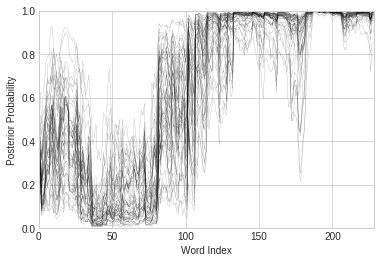

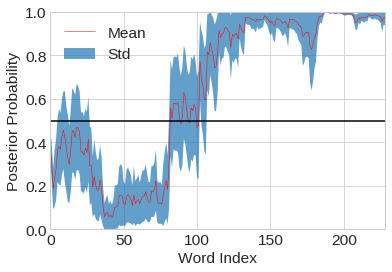

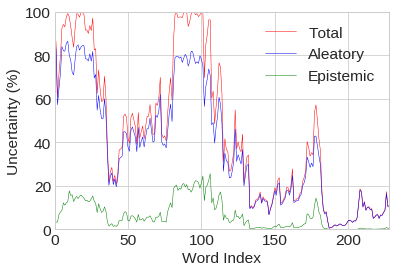

In [6]:
# example 1: negative review
i = 374
e_i = X_val[i].reshape(1, MAX_SEQUENCE_LENGTH)
w_i = conv.id2text(e_i)
y_i = y_val[i]
l_i = len(w_i.split(' '))
    
print(f'true label: {y_i.argmax()} \n')
print(w_i)

plot(e_i, l_i)

true label: 1 

the movie plot seems to have been constructed from disjointed dream there is not enough realism to hold the viewer is interest the vermont farm scene was failed opportunity to show the way farms were set up and farm families lived which would have been interesting and entertaining there was little if no research into the whiskey [?] trade of the period the costumes of the canadians looked like something from the french revolution totally unbelievable the fiddle playing was good and of the time period but chris is motions while supposedly playing were unbelievable the owl is appearance was never explained mystery and the train disappearing into thin air was too much could not understand how live trout got frozen into the ice and why two men in the wilderness without food would release the trout good food source

predict ...
ok


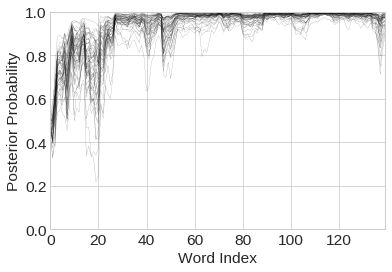

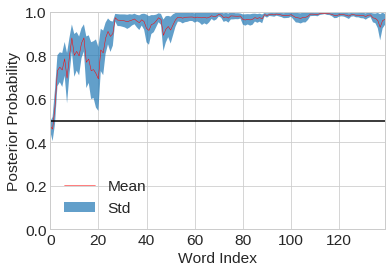

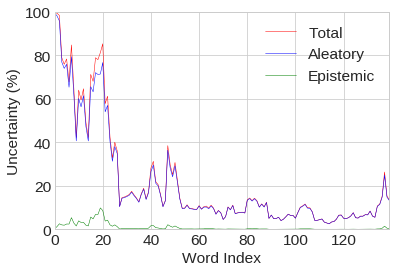

In [7]:
# example 2: negative review
i = 455
e_i = X_val[i].reshape(1, MAX_SEQUENCE_LENGTH)
w_i = conv.id2text(e_i)
y_i = y_val[i]
l_i = len(w_i.split(' '))
    
print(f'true label: {y_i.argmax()} \n')
print(w_i)

plot(e_i, l_i)

the movie plot seems to have been constructed from disjointed dream there is not enough realism to hold the viewer is interest the vermont farm scene was failed opportunity to show the way farms were set up and farm families lived which would have been interesting and entertaining there was little if no research into the whiskey [?] trade of the period the costumes of the canadians looked like something from the french revolution totally unbelievable the fiddle playing was good and of the time period but chris is motions while supposedly playing were unbelievable the owl is appearance was never explained mystery and the train disappearing into thin air was too much could not understand how live trout got frozen into the ice and why two men in the wilderness without food would release the trout good food sourceit took me years to finally catch this gem of film and it was worth the wait in nearly all of his films clint always plays the hero be it hero anti hero or avenging hero in this f

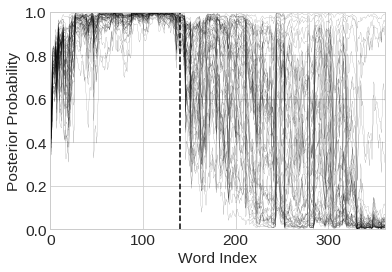

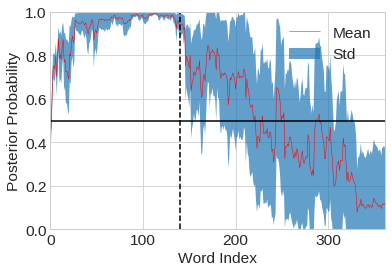

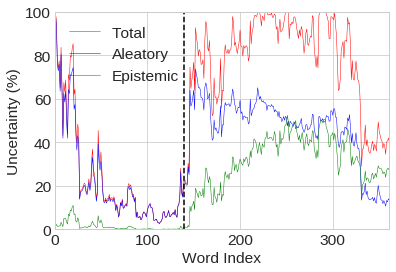

In [8]:
# example 3: mixed review
i = 455
j = 2
e_i = X_val[i].reshape(1, MAX_SEQUENCE_LENGTH)
e_j = X_val[j].reshape(1, MAX_SEQUENCE_LENGTH)
v_line = len(conv.id2text(e_i).split(' '))
w_ij = conv.id2text(e_i) + conv.id2text(e_j)
e_ij = conv.text2id(w_ij).reshape(1, MAX_SEQUENCE_LENGTH) 
l_ij = len(conv.id2text(e_ij).split(' '))

print(w_ij)

plot(e_ij, l_ij, v_line)